<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos</p>
<p style="margin: 0; text-align:right;">2022-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos:</strong>
</div>

# PEC 4: Series temporales y combinación de modelos de regresión

Está actividad está dividida en dos partes:

 - **[Series temporales](#ej1)**: Descomponer y componer series temporales para realizar predicciones a futuro.
 - **[Combinación de clasificadores](#ej2)**: Estudio de diferentes métodos de combinación de clasificadores.

<u>Consideraciones generales</u>: 

- La solución planteada no puede utilizar métodos, funciones o parámetros declarados **_deprecated_** en futuras versiones, a excepción de que se indique explícitamente.
- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.
- En esta PEC se deben usar **únicamente las librerías que se importan a continuación**. Si se desea usar otra librería hay que consultarlo con el tutor/tutora del aula.

<u>Formato de la entrega</u>:

- Algunos ejercicios pueden suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

Iniciamos la PEC con la carga de las siguientes librerías:

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import svm

%matplotlib inline

<a id="ej1"></a>

# 1. Series temporales (6 puntos)

En este primer ejercicio trabajaremos con series temporales. Para ello, usaremos el dataset **temperatura.csv** que contiene la temperatura media mensual de Barcelona de los últimos 15 años, de 2008 a 2022.

Empezaremos leyendo los datos y observando gráficamente su distribución. Como se puede apreciar, es un claro caso de serie temporal, con heterocedasticidad, tendencia, periodo y ruido. A lo largo de este ejercicio trataremos cada uno de estos puntos.

In [2]:
data = pd.read_csv("temperatura.csv", parse_dates=['Year_Month'], index_col='Year_Month', header=0)
data.head()

,Temperature
Year_Month,
2008-01-01,10.1
2008-02-01,10.2
2008-03-01,10.8
2008-04-01,13.7
2008-05-01,16.6


<Axes: xlabel='Year_Month'>

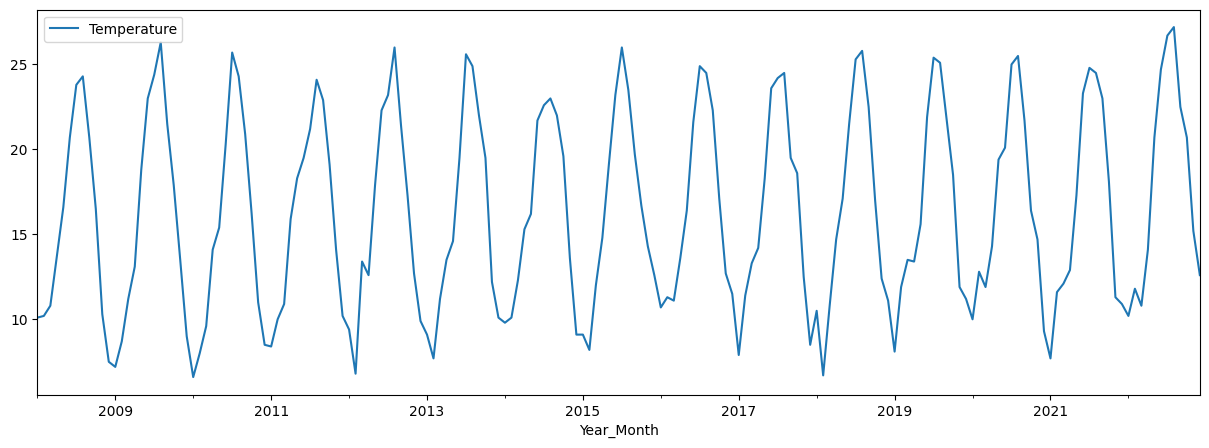

In [3]:
data.plot(figsize=(15, 5))

A continuación, vamos a separar los últimos tres años de datos del dataset original, los cuales nos servirán como conjunto de test. Así, cuando hagamos una predicción a futuro podremos comprobar si se ajusta a los datos reales. El resto del conjunto de datos, será nuestro conjunto de datos de entrenamiento.

In [4]:
TEST_SIZE = 36
train, test = data.iloc[:-TEST_SIZE].to_numpy(), data.iloc[-TEST_SIZE:].to_numpy()
x_train, x_test = np.arange(train.shape[0]), np.arange(train.shape[0], data.shape[0])
train.shape, x_train.shape, test.shape, x_test.shape

((144, 1), (144,), (36, 1), (36,))

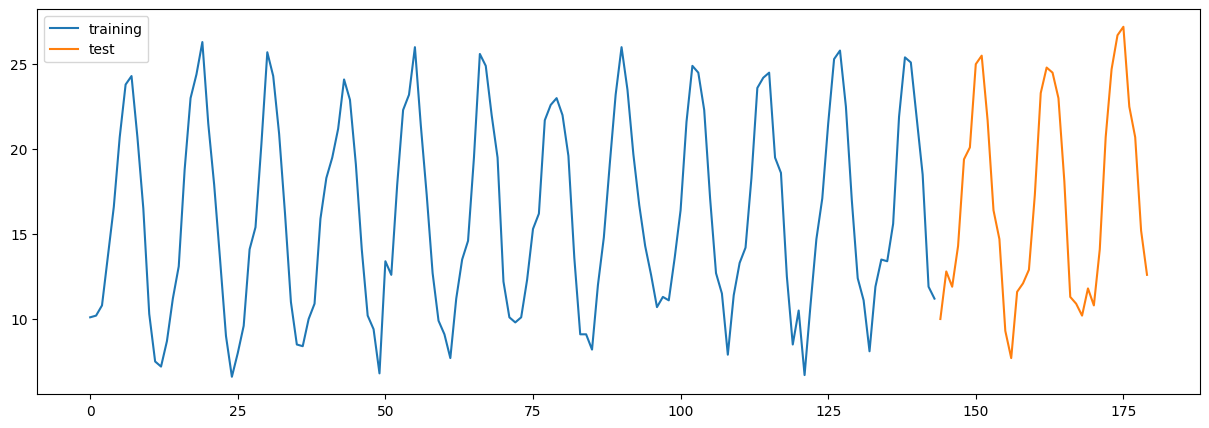

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label='training')
ax.plot(x_test, test, label='test')
ax.legend()

## 1.1 Componentes de la serie temporal

### 1.1.a. Heterocedasticidad

Una serie temporal tiene heterocedasticidad cuando la variancia varía con el tiempo (https://es.wikipedia.org/wiki/Heterocedasticidad). En nuestro caso, observamos que tenemos una leve heterocedasticidad, ya que la amplitud de onda varía levemente con el tiempo. En este primer apartado debéis eliminar la heterocedasticidad de la serie temporal. Es decir, que la diferencia entre el mínimo y el máximo de la estacionalidad (anual) sea más o menos la misma a lo largo del tiempo.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> transforma los <strong>datos de entrenamiento</strong> para eliminar la heterocedasticidad. Para ello debéis transformar los datos aplicando la función que consideréis que elimina mejor la heterocedasticidad en el dataset (exponencial, logarítmica, ...). Estas funciones ya están implementadas en numpy. Graficar los datos originales junto con los datos transformados.
</div>

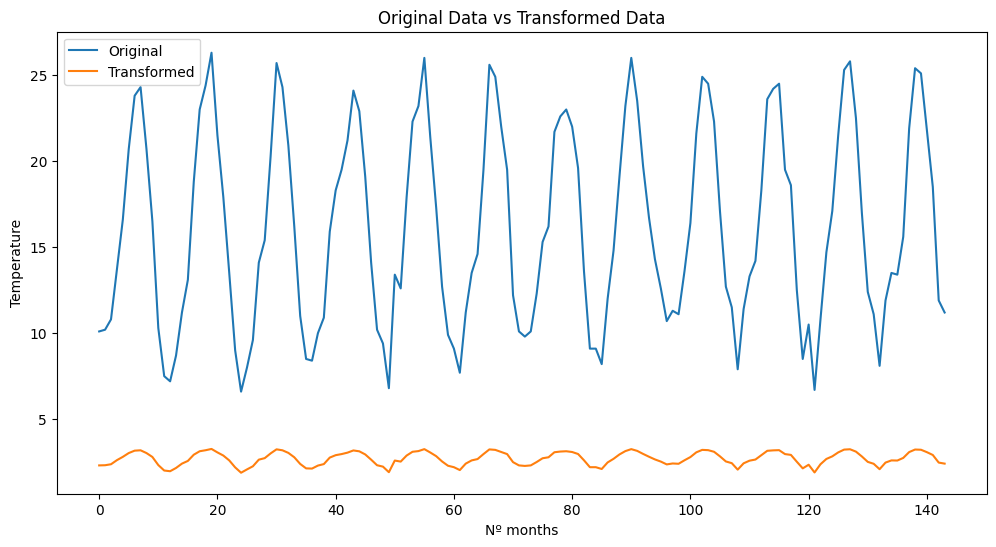

In [6]:

# Aplicar transformación logarítmica a los datos de entrenamiento
train_transformed = np.log(train)

# Graficar los datos originales y transformados
plt.figure(figsize=(12, 6))
plt.plot(x_train, train, label='Original')
plt.plot(x_train, train_transformed, label='Transformed')
plt.xlabel('Nº months')
plt.ylabel('Temperature')
plt.title('Original Data vs Transformed Data')
plt.legend()
plt.show()

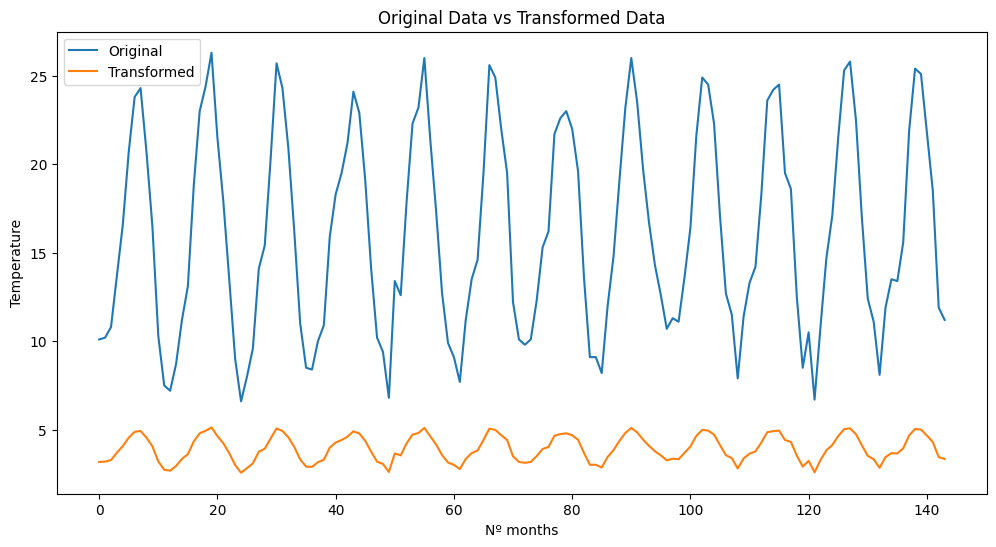

In [7]:
# Aplicar transformación de raíz cuadrada a los datos de entrenamiento
train_transformed = np.sqrt(train)

# Graficar los datos originales y transformados
plt.figure(figsize=(12, 6))
plt.plot(x_train, train, label='Original')
plt.plot(x_train, train_transformed, label='Transformed')
plt.xlabel('Nº months')
plt.ylabel('Temperature')
plt.title('Original Data vs Transformed Data')
plt.legend()
plt.show()

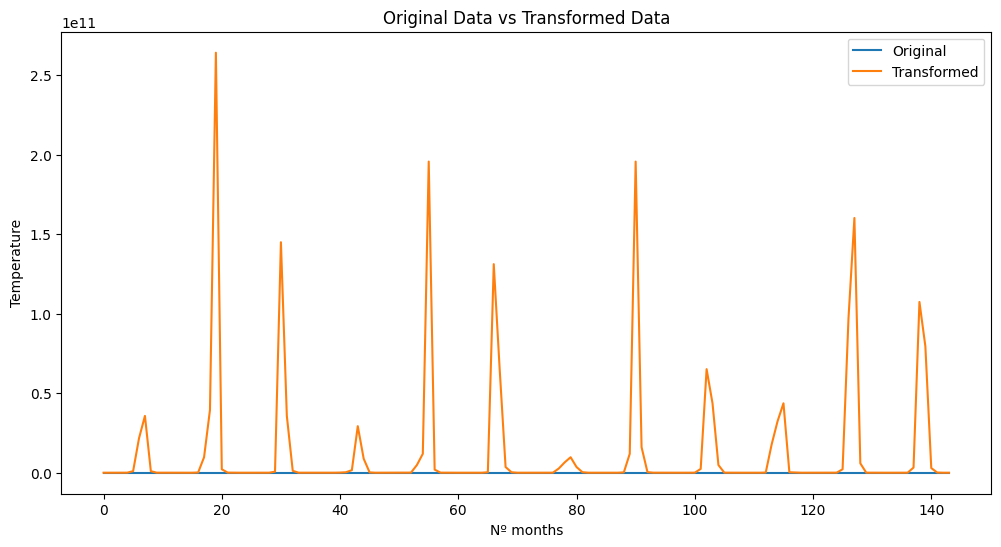

In [8]:
# Aplicar transformación exponencial a los datos de entrenamiento
train_transformed = np.exp(train)

# Graficar los datos originales y transformados
plt.figure(figsize=(12, 6))
plt.plot(x_train, train, label='Original')
plt.plot(x_train, train_transformed, label='Transformed')
plt.xlabel('Nº months')
plt.ylabel('Temperature')
plt.title('Original Data vs Transformed Data')
plt.legend()
plt.show()

### 1.1.b. Tendencia

La tendencia es el comportamento que tienen los datos a largo plazo (https://miro.medium.com/max/1872/1*rDQL2fAp_X_dgAHNZuwRfw.png). En nuestra serie temporal tenemos una ligera tendencia lineal creciente. En este apartado debéis eliminar la tendencia, quedando una serie temporal con tendencia constante.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> elimina la tendencia de los datos transformados en la sección anterior. Observando la serie, podemos apreciar que tenemos una tendencia lineal, por ese motivo, podemos ajustar una regresión lineal (usando scikit-learn) y sustraerla a los datos anteriores (entrenamiento sin heterocedasticidad). En este ejercicio, primero debemos graficar la serie con tendencia junto con la regresión lineal y, a continuación, se debe sustraer la tendencia y graficar la serie resultante (sin tendencia).
</div>

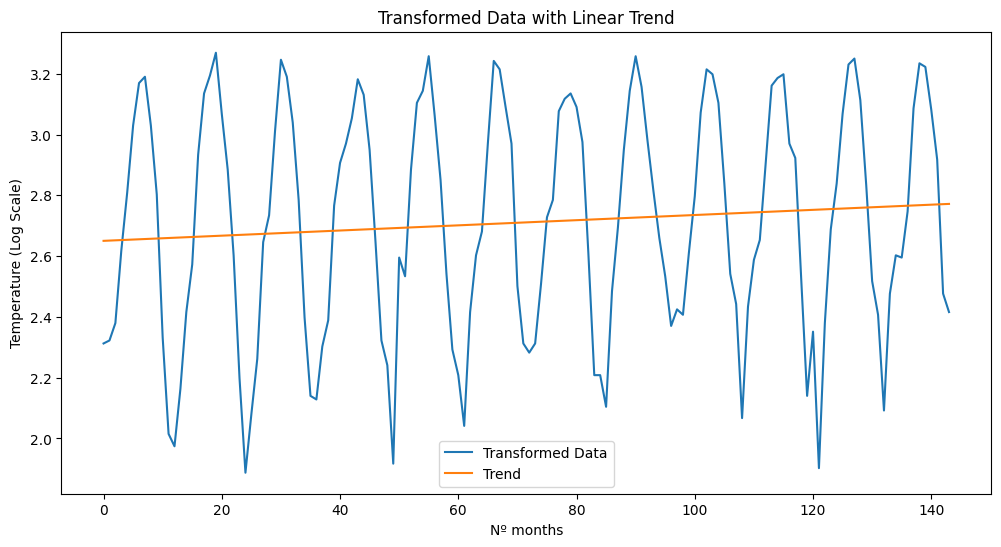

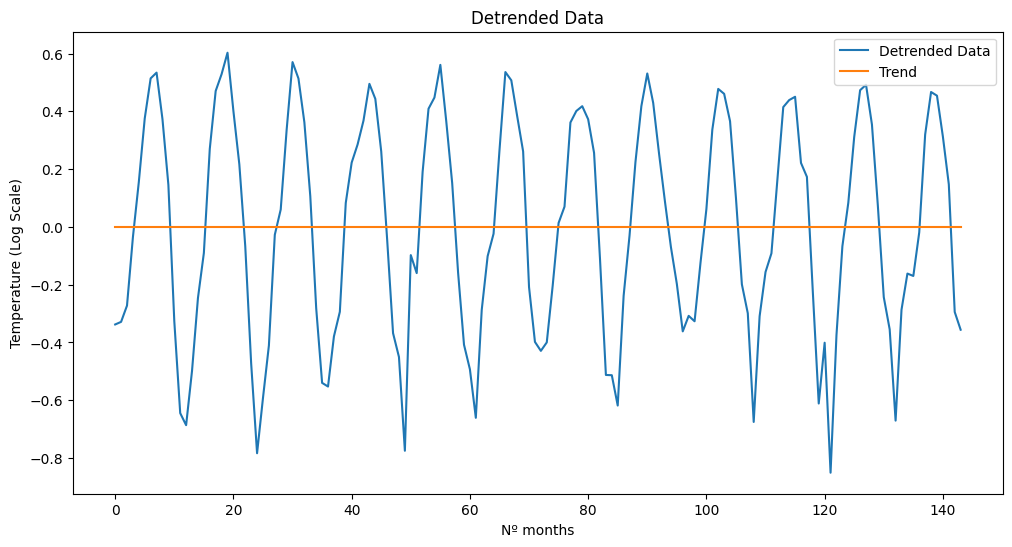

In [9]:
# Aplicar transformación logarítmica a los datos de entrenamiento
train_transformed = np.log(train)

# Ajustar una regresión lineal a los datos transformados
x_train = np.arange(train_transformed.shape[0]).reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(x_train, train_transformed)

# Obtener la tendencia lineal ajustada
trend = regressor.predict(x_train)

# Sustraer la tendencia de los datos transformados
detrended_data = train_transformed - trend

# Graficar la serie con tendencia y la regresión lineal
plt.figure(figsize=(12, 6))
plt.plot(train_transformed, label='Transformed Data')
plt.plot(trend, label='Trend')
plt.xlabel('Nº months')
plt.ylabel('Temperature (Log Scale)')
plt.title('Transformed Data with Linear Trend')
plt.legend()
plt.show()

regressor_for_plot = LinearRegression()
regressor_for_plot.fit(x_train, detrended_data)

# Obtener la tendencia lineal ajustada
trend = regressor_for_plot.predict(x_train)


# Graficar la serie resultante sin tendencia
plt.figure(figsize=(12, 6))
plt.plot(detrended_data, label='Detrended Data')
plt.plot(trend, label='Trend')
plt.xlabel('Nº months')
plt.ylabel('Temperature (Log Scale)')
plt.title('Detrended Data')
plt.legend()
plt.show()

### 1.1.c. Estacionalidad

Definimos la estacionalidad como la variación cíclica que se produce en los datos (https://es.wikipedia.org/wiki/Estacionalidad). En este apartado se debe encontrar y eliminar la estacionalidad.

#### 1.1.c.a. Encontrar el periodo de la estacionalidad

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> en primer lugar debéis encontrar el ciclo, es decir, cada cuánto se repiten los datos. Para ello, podemos usar la autocorrelación (numpy te permite obtener los coeficientes de correlación). En este ejercicio, se pide graficar los coeficientes para los 22 primeros valores de autocorrelación y determinar su valor máximo, el cual será nuestra estacionalidad. Dar una interpretación semántica del resultado obtenido.
</div>

<strong>Nota:</strong> utilizad la serie obtenida en el apartado anterior (sin tendencia ni heterocedasticidad).

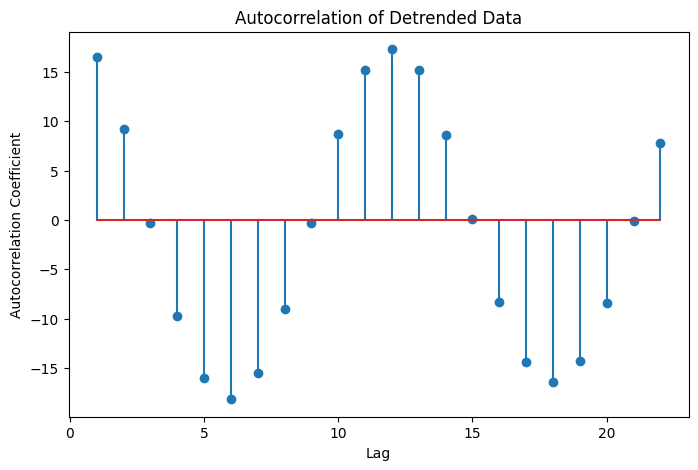

In [10]:
# Obtener la serie sin tendencia ni heterocedasticidad
train_detrended = detrended_data.squeeze()

# Calcular los coeficientes de autocorrelación
autocorr = np.correlate(train_detrended, train_detrended, mode='full')
autocorr = autocorr[autocorr.size // 2:]  # Tomar solo la mitad derecha de los coeficientes

# Graficar los coeficientes de autocorrelación
plt.figure(figsize=(8, 5))
plt.stem(range(1, 23), autocorr[1:23])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation Coefficient')
plt.title('Autocorrelation of Detrended Data')
plt.show()


In [11]:
# Encontrar el valor máximo de autocorrelación
max_autocorr = np.max(autocorr[1:22])
print("Valor máximo de autocorrelación:", max_autocorr)
max_value=np.where(autocorr == max_autocorr)
print("Valor lag máximo autocorrelación:", max_value[0][0])

Valor máximo de autocorrelación: 17.30565717733535
Valor lag máximo autocorrelación: 12


La interpretación semántica del resultado obtenido se basa en el análisis de los coeficientes de autocorrelación y su valor máximo. Los coeficientes de autocorrelación miden la similitud entre una serie temporal y sus versiones retrasadas en diferentes intervalos de tiempo (lags). El valor máximo de autocorrelación corresponde al lag en el cual se observa la mayor similitud entre los datos y su versión retrasada.

En este caso, al graficar los coeficientes de autocorrelación y determinar su valor máximo, estamos identificando el ciclo o periodo en el cual los datos presentan una repetición cíclica. La interpretación semántica de este valor máximo de autocorrelación es que indica la estacionalidad de la serie.

Si el valor máximo de autocorrelación se encuentra en un lag de, por ejemplo, 12 meses, significa que los datos exhiben un patrón estacional que se repite cada 12 meses. Esto puede indicar la presencia de una estacionalidad anual en los datos, como patrones climáticos que se repiten cada año.

#### 1.1.c.b. Calcular el patrón de estacionalidad

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> ahora que ya conocéis el ciclo, debéis calcular el patrón (el molde de la estacionalidad). Es decir, para cada punto del ciclo, calcular la mediana de ese punto en cada uno de los ciclos de la serie. 
</div>

<strong>Nota:</strong> utilizad la serie obtenida en el apartado anterior (sin tendencia ni heterocedasticidad).

In [12]:
num_puntos_ciclo = 12

# Redimensionar los datos en ciclos completos
train_ciclos = np.reshape(detrended_data, (-1, num_puntos_ciclo))

# Calcular la mediana a lo largo de los ciclos
patron_estacionalidad = np.median(train_ciclos, axis=0)

# Imprimir el patrón de estacionalidad
print(patron_estacionalidad)

[-0.50328039 -0.44896724 -0.25940646 -0.07877408  0.11948808  0.34899311
  0.47556924  0.49368463  0.3656317   0.14972606 -0.20364042 -0.4030677 ]


<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> una vez obtenido el patrón, replicadlo a lo largo de toda la serie temporal. Cuando lo hayáis calculado, debéis restarlo de la serie temporal (sin tendencia ni heterocedasticidad). Graficar los datos con estacionalidad junto con los datos sin estacionalidad.
</div>

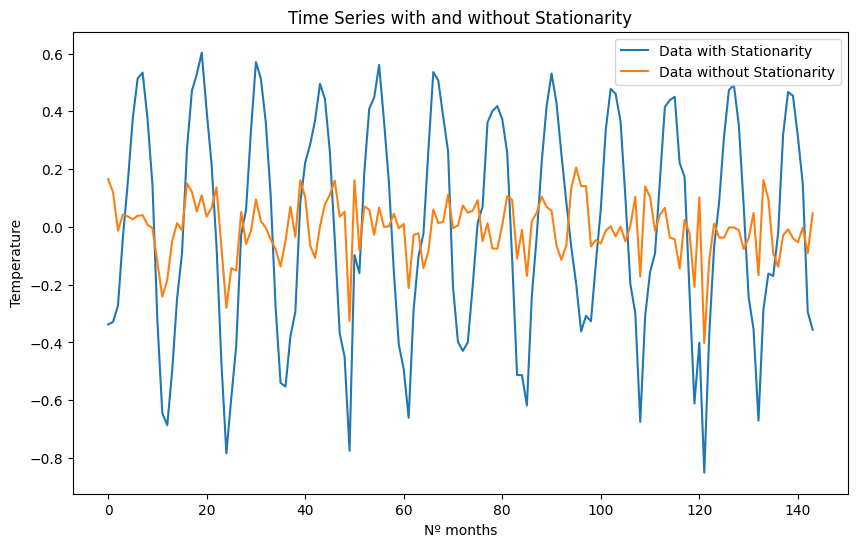

In [13]:
# Replicar el patrón de estacionalidad a lo largo de toda la serie temporal
replicado_estacionalidad = np.tile(patron_estacionalidad, len(train_detrended) // len(patron_estacionalidad))
train_estacionalidad = replicado_estacionalidad[:len(train_detrended)]

# Restar el patrón de estacionalidad de la serie temporal sin tendencia ni heterocedasticidad
train_sin_estacionalidad = train_detrended - train_estacionalidad

# Graficar los datos con y sin estacionalidad
plt.figure(figsize=(10, 6))
plt.plot(train_detrended, label='Data with Stationarity')
plt.plot(train_sin_estacionalidad, label='Data without Stationarity')
plt.xlabel('Nº months')
plt.ylabel('Temperature')
plt.legend()
plt.title('Time Series with and without Stationarity') 
plt.show()

### 1.1.d. Ruido

Una vez eliminadas la heterocedasticidad, la tendencia y la estacionalidad, lo que nos queda es el ruido. El ruido sigue una distribución normal. En este apartado debéis encontrar los parámetros de la distribución que sigue el ruido (media y desviación estandard).

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> encontrar la distribución que tiene el ruido (media y desviación estándard) usando el ruido obtenido en el apartado anterior, es decir, la serie sin heterocedasticidad, tendencia y estacionalidad. Podéis usar scipy.stats. Por último, graficad un histograma del ruido junto con un histograma de la distribución teórica que tiene el ruido.
</div>

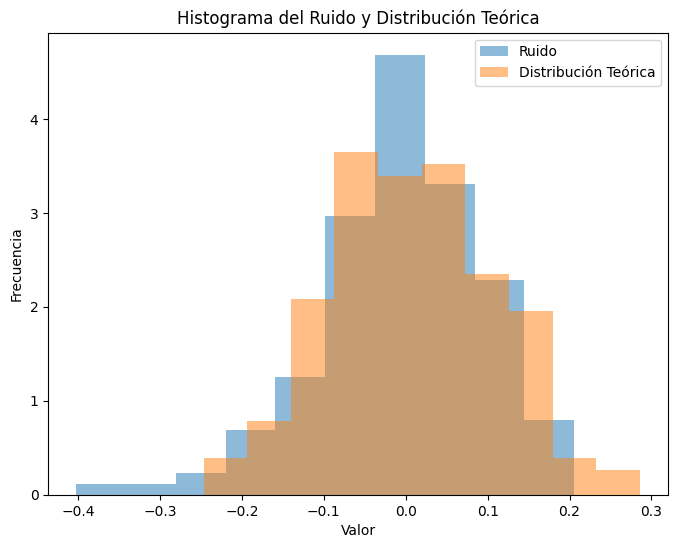

In [14]:
import scipy.stats as stats

# Calcular los parámetros de la distribución normal
media_estimada = np.mean(train_sin_estacionalidad)
desviacion_estimada = np.std(train_sin_estacionalidad)

# Crear una distribución normal con los parámetros estimados
distribucion_normal = stats.norm(loc=media_estimada, scale=desviacion_estimada)

# Generar una muestra de la distribución normal para graficar el histograma teórico
muestra_teorica = distribucion_normal.rvs(size=len(train_sin_estacionalidad))

# Graficar el histograma del ruido junto con el histograma de la distribución teórica
plt.figure(figsize=(8, 6))
plt.hist(train_sin_estacionalidad, bins=10, density=True, alpha=0.5, label='Ruido')
plt.hist(muestra_teorica, bins=10, density=True, alpha=0.5, label='Distribución Teórica')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Histograma del Ruido y Distribución Teórica')
plt.show()

## 1.2. Predicción

Una vez que hemos descompuesto la serie temporal (de entrenamiento), vamos a predecir los tres proximos años y comparar la predicción con los datos reales. Para ello seguiremos los siguientes pasos:

- Generar ruido
- Añadir estacionalidad
- Añadir tendencia
- Añadir heterocedasticidad

### 1.2.a. Ruido

Como hemos visto que el ruido se distribuye aleatoriamente siguiendo una distribución normal, vamos a generar ruido siguiendo esta distribución.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> genera tres años de datos de ruido (36 muestras) usando la distribución encontrada en el apartado 1.1.d. Podéis usar el módulo random de numpy. Por último, graficad el resultado.
</div>

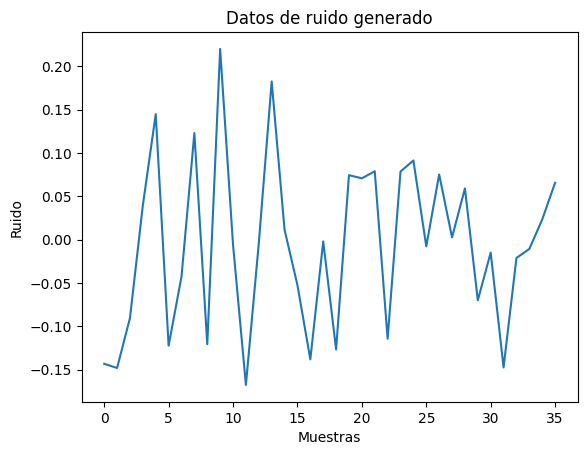

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generar tres años de datos de ruido
num_samples = 36
noise = np.random.normal(loc=media_estimada, scale=desviacion_estimada, size=num_samples,)

# Graficar el resultado
plt.plot(noise)
plt.xlabel('Muestras')
plt.ylabel('Ruido')
plt.title('Datos de ruido generado')
plt.show()

### 1.2.b. Estacionalidad

Anteriormente hemos calculado la estacionalidad y el ciclo de la serie temporal. Vamos a usar esa estacionalidad ya calculada para añadirla a nuestra predicción.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> añade a los tres años de ruido calculados en el apartado anterior, la estacionalidad encontrada en el apartado 1.1.c. Grafica el resultado.
</div>

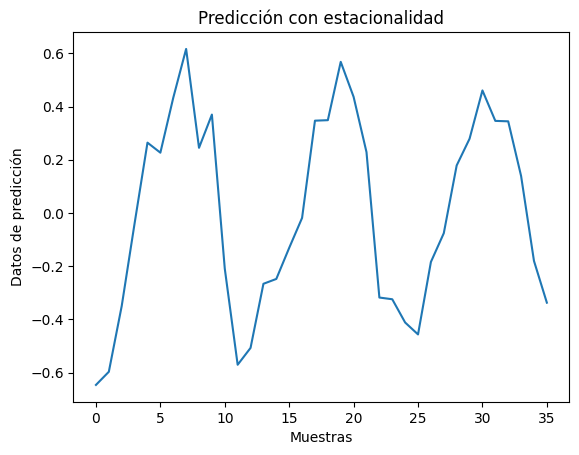

In [16]:
# Repetir la estacionalidad para cubrir los tres años
replicated_seasonality = np.tile(patron_estacionalidad, num_samples // len(patron_estacionalidad))

predicted_seasonality = replicated_seasonality[:num_samples]
prediction_with_seasonality = noise + predicted_seasonality

# Graficar el resultado
plt.plot(prediction_with_seasonality)
plt.xlabel('Muestras')
plt.ylabel('Datos de predicción')
plt.title('Predicción con estacionalidad')
plt.show()

### 1.2.c. Tendencia

En la sección 1.1.b hemos visto que los datos de la serie temporal tienen una tendencia lineal y la hemos calculado mediante una regresión lineal. Ahora, vamos a añadir esta tendencia a nuestra predicción.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> añade a los tres años de ruido y estacionalidad calculados en el apartado anterior, la tendencia encontrada en el apartado 1.1.b. Por último, graficad la serie obtenida.
</div>

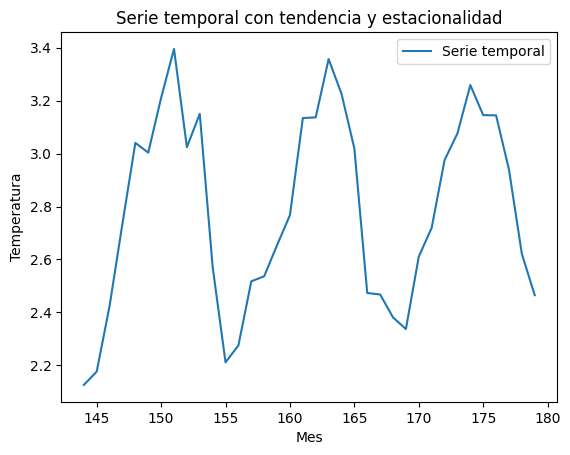

In [17]:
x_prediction = np.arange(train.shape[0], train.shape[0] + num_samples).reshape(-1, 1)
predicted_trend = regressor.predict(x_prediction)
prediction_with_trend = prediction_with_seasonality + predicted_trend.flatten()

plt.plot(x_prediction, prediction_with_trend, label='Serie temporal')
plt.xlabel('Mes')
plt.ylabel('Temperatura')
plt.title('Serie temporal con tendencia y estacionalidad')
plt.legend()
plt.show()

### 1.2.d. Heterocedasticidad

En el primer apartado de esta práctica hemos visto que la serie temporal tiene heterocedasticidad y la hemos eliminado transformando los datos. En este apartado haremos la transfromación inversa para añadir heterocedasticidad a nuestra predicción.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> añade a los tres años de ruido, estacionalidad y tendencia calculados en el apartado anterior, la heterocedasticidad, aplicando la función inversa a la encontrada en el apartado 1.1.a. Grafica el resultado junto con la serie completa y compara la predicción obtenida con los datos reales.
</div>

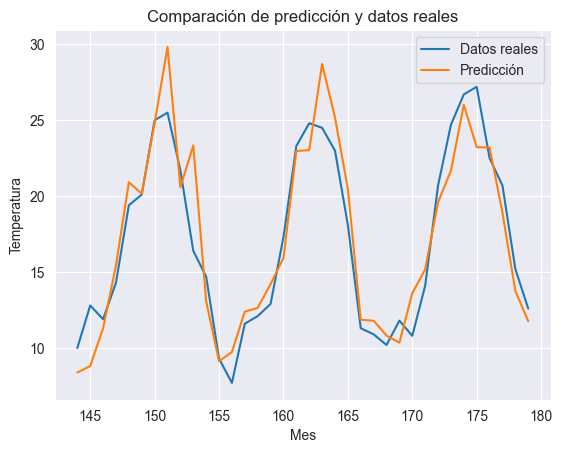

In [18]:
import seaborn as sns
sns.set_style("darkgrid")

# Aplicar la función inversa del logaritmo para obtener heterocedasticidad
inverse_heteroscedasticity = np.exp(prediction_with_trend)

plt.plot(x_prediction, test, label='Datos reales')
plt.plot(x_prediction, inverse_heteroscedasticity, label='Predicción')
plt.xlabel('Mes')
plt.ylabel('Temperatura')
plt.title('Comparación de predicción y datos reales')
plt.legend()
plt.show()


<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> Analizad los resultados obtenidos.
</div>

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt 

# Cálculo del error cuadrático medio (MSE)
mse = mean_squared_error(test, inverse_heteroscedasticity)

# Cálculo del coeficiente de determinación (R^2)
r2 = r2_score(test, inverse_heteroscedasticity)

print(f"Error medio (MSE): {sqrt(mse):.2f} ºC")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")

Error medio (MSE): 2.23 ºC
Coeficiente de determinación (R^2): 0.85


Observando el gráfico que compara los datos reales y la predicción, podemos notar que en general, la predicción sigue la tendencia de los datos reales de temperatura. Sin embargo, hay algunas desviaciones entre los puntos reales y la línea de predicción. En general, la predicción se mantiene cerca de los valores reales, pero hay algunos puntos donde se produce una ligera variación. Esto indica que la predicción no es perfecta, pero sigue una tendencia similar a los datos reales.

Si estamos tratando con temperaturas en una escala de Celsius y buscamos una precisión alta, un MSE de 6.33 indica que la predicción puede tener una discrepancia promedio de alrededor de 2.5 grados Celsius (la raíz cuadrada del MSE). Esto significa que, en el ejemplo que mencionaste, si hemos predicho estar a 10ºC, podría haber una variabilidad de aproximadamente ±2.5ºC, lo que significa que podríamos estar en realidad entre 7.5ºC y 12.5ºC.

En algunas aplicaciones, este nivel de discrepancia puede considerarse aceptable. Por ejemplo, si estamos realizando predicciones a largo plazo o en un contexto donde hay factores externos que pueden influir en la temperatura, una discrepancia de ±2.5ºC puede ser razonable. Sin embargo, en aplicaciones donde se requiere una alta precisión, como en sistemas de control climático o pronósticos meteorológicos de corto plazo, un MSE de 6.33 podría considerarse alto y se buscaría reducir ese valor.

El valor del coeficiente de determinación (R^2) obtenido es 0.812. Este valor varía entre 0 y 1, donde 1 indica una predicción perfecta y 0 indica que la predicción no explica la variabilidad de los datos reales. En este caso, el valor de R^2 indica que aproximadamente el 81.2% de la variabilidad de los datos reales se explica mediante la predicción realizada. Esto sugiere que la predicción tiene un buen nivel de ajuste en general, pero aún existe una variabilidad no explicada.


<a id="ej2"></a>

# 2. Combinación de clasificadores (4 puntos)

El ensemble learning es una estrategia en la que se utiliza un grupo de modelos para resolver un problema mediante la combinación estratégica de diversos modelos de aprendizaje automático en un sólo modelo predictivo.

En general, los métodos de ensemble se utilizan principalmente para mejorar la precisión del rendimiento general de un modelo y combinar varios modelos diferentes, también conocidos como aprendices básicos, para predecir los resultados, en lugar de utilizar un sólo modelo.

¿Por qué entrenamos tantos clasificadores diferentes en lugar de uno solo? Bueno, el uso de varios modelos para predecir el resultado final en realidad reduce la probabilidad de sopesar las decisiones tomadas por modelos deficientes (sobreentrenados, no debidamente ajustados...).

Cuanto más diversos sean estos aprendices básicos, más poderoso será el modelo final.

Tengamos en cuenta que en cualquier modelo de aprendizaje automático, el error de generalización viene dado por la suma de cuadrados de bias + varianza + error irreductible.

¡Los errores irreductibles son algo que está más allá de nosotros! No podemos reducirlos.

Sin embargo, utilizando ensembles, podemos reducir el sesgo (bias) y la varianza de un modelo. Esto reduce el error de generalización general.

La <strong>compensación de sesgo-varianza</strong> es el punto de referencia más importante que diferencia un modelo robusto de uno inferior (entendamos por inferior un modelo no demasiado generalizable).

Aunque no es una regla exacta, en el aprendizaje automático, los modelos que tienen un sesgo alto tienden a tener una varianza más baja y viceversa.

Hemos estado hablando de bias y varianza. Pero veamos que entendemos por sesgo de un modelo y por varianza de un modelo.

1. <strong>Sesgo</strong>: El sesgo es un error que surge debido a suposiciones falsas realizadas en la fase de aprendizaje de un modelo. Un sesgo alto puede hacer que un algoritmo de aprendizaje omita información importante y correlaciones entre las variables independientes y las etiquetas de clase, por lo que no se ajusta al modelo.

2. <strong>Varianza</strong>: la varianza nos dice qué tan sensible es un modelo a los pequeños cambios en los datos de entrenamiento. Es decir, cuánto cambia el modelo. Una gran variación en un modelo lo hará propenso al ruido aleatorio presente en el conjunto de datos, por lo que se ajustará demasiado al modelo.

Para comprender con más detalle la compensación de sesgo y varianza en los modelos de aprendizaje automático, podeís consultar este [artículo](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229).

Una vez llegados a este punto, podemos dividir los ensembles en cuatro categorías:

1. <strong>Bagging</strong>: El bagging se utiliza principalmente para reducir la variación en un modelo. Un ejemplo simple de bagging es el algoritmo Random Forest.

2. <strong>Boosting</strong>: El boosting se utiliza principalmente para reducir el sesgo en un modelo. Ejemplos de algoritmos de impulso son Ada-Boost, XGBoost, árboles de decisión mejorados por gradiente, etc.

3. <strong>Stacking</strong>: el stacking se utiliza principalmente para aumentar la precisión de predicción de un modelo.

4. <strong>Cascading</strong>: esta clase de modelos son muy precisos. La conexión en cascada se usa principalmente en escenarios en los que no puede permitirse cometer un error. Por ejemplo, una técnica en cascada se usa principalmente para detectar transacciones fraudulentas con tarjetas de crédito.

## Datos

Para este ejercicio usaremos el dataset <strong>diabetes.csv</strong>. Este conjunto de datos es original del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo de este dataset es predecir, basándose en las mediciones de diagnóstico, si un paciente tiene diabetes.

En particular, todos los pacientes aquí son mujeres de al menos 21 años de ascendencia india Pima.

El dataset contiene la siguiente información:

- Embarazos: número de embarazos 
- Glucosa: concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral 
- Presión arterial: presión arterial diastólica (mm Hg) 
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm) 
- Insulina: insulina sérica de 2 horas (mu U / ml) 
- IMC: índice de masa corporal (peso en kg / (altura en m) ^ 2) 
- DiabetesPedigreeFunction: función del pedigrí de la diabetes 
- Edad: Edad (años) 
- Resultado (variable objetivo): variable de clase (0 o 1)

En la primera parte de este ejercicio veremos la combinación de clasificadores en paralelo mediante las tecnicas de <strong>Bagging</strong> y <strong>Boosting</strong>.

En la segunda parte intentaremos mejorar los resultados aplicando tecnicas de combinación secuencial de clasificadores: <strong>Stacking</strong> y <strong>Cascading</strong>.

Para empezar, veamos como es el dataset.

In [20]:
diabetes = pd.read_csv('diabetes.csv')

nRow, nCol = diabetes.shape
print(f'Hay {nRow} filas y {nCol} columnas')
diabetes.head()

Hay 768 filas y 9 columnas


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Para poder probar varios modelos, primero vamos a dividir el dataset entre train y test. Además, para que todos obtengáis los mismos resultados y poder comentar dudas por el foro/correo, fijaremos la seed para obtener los mismos datasets de train y test.

Como en este ejercicio trataremos stacking y cascading, y ambos se aplican sobre el conjunto de test, haremos un split del 60% para tener un poco más de base al aplicar estas dos técnicas.

In [21]:
myseed = 13
X = diabetes.drop(columns = 'Outcome')
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=myseed)

## 2.1. Combinación paralela de clasificadores (1.5 puntos)

### 2.1.1. Árboles de decisión

Para poder comparar el aumento de performance obtenido a medida que vamos aplicando técnicas nuevas, utilizaremos como baseline un simple árbol de decisión.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Define un árbol de decisión con profundidad máxima de 3 niveles (aplicaremos la misma restricción en las siguientes secciones), utilizando la semilla definida en el apartado anterior y calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación, entrena el árbol de decisión sobre el conjunto de datos de train y evalua sobre test utilizando la precisión como métrica ('accuracy'). <strong>Sugerencia:</strong> usar el módulo <strong>cross_val_score</strong> de <strong>sklearn</strong>.
</div>

Para aprender más sobre <strong>cross validation</strong> y sobre como usar estos módulos, os recomendamos los siguientes enlaces:
- [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
- [cross_validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [22]:
# Creamos modelo de árbol de decisión
model_tree = DecisionTreeClassifier(max_depth=3, random_state=myseed)
scores = cross_val_score(model_tree, X_train, y_train, cv=5)
print(f'Precisión del modelo: {scores.mean():.2f} (+/- {scores.std():.2f})')

# Entrenamos el modelo
model_tree.fit(X_train, y_train)

# Calculamos la precisión del modelo
y_pred = model_tree.predict(X_test)
print(f'Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}')

Precisión del modelo: 0.70 (+/- 0.07)
Precisión del modelo: 0.73


<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> Analizad los resultados obtenidos.
    <p>La diferencia entre las precisiones calculadas radica en el enfoque utilizado para evaluar el rendimiento del modelo y el conjunto de datos en el que se calculan.
    En el primer caso, se utiliza la validación cruzada con la función cross_val_score() para evaluar el modelo. La validación cruzada es una técnica que divide el conjunto de datos en k partes iguales (en este caso, k=5) y realiza k iteraciones de entrenamiento y evaluación.En cada iteración, se entrena el modelo en k-1 partes de los datos y se evalúa en la parte restante. Luego se calcula la precisión en cada iteración y se obtiene la media y la desviación estándar de las precisiones obtenidas en las k iteraciones.En el segundo caso, se entrena el modelo en todo el conjunto de entrenamiento (X_train y y_train) y se evalúa en el conjunto de prueba (X_test y y_test). La precisión se calcula comparando las etiquetas predichas (y_pred) con las etiquetas reales (y_test) utilizando la función accuracy_score().La diferencia principal es que la validación cruzada proporciona una evaluación más robusta del rendimiento del modelo al utilizar múltiples divisiones de los datos de entrenamiento y prueba. Proporciona una estimación más confiable de la precisión media y la variabilidad del modelo. Por otro lado, la precisión calculada en el conjunto de prueba representa cómo se desempeña el modelo en datos no vistos después de haber sido entrenado en todo el conjunto de entrenamiento.</p>
</div>

### 2.1.2. Bagging

La idea central del bagging es usar réplicas del conjunto de datos original y usarlas para entrenar diferentes clasificadores.

Crearemos subconjuntos muestreando aleatoriamente un montón de puntos del conjunto de datos de entrenamiento con reemplazo.

Ahora entrenaremos clasificadores individuales en cada uno de estos subconjuntos bootstrap.

Cada uno de estos clasificadores base predecirá la etiqueta de clase para un problema dado. Aquí es donde combinamos las predicciones de todos los modelos base. Esta parte se llama etapa de agregación. Es por eso que encontraréis los ensembles bagging por el nombre de ensembles de agregación.

Por lo general, se usa un voto de mayoría simple en un sistema de clasificación y se toma la media de todas las predicciones para los modelos de regresión para combinar todos los clasificadores base en un solo modelo y proporcionar el resultado final del modelo de conjunto.

Un ejemplo simple de tal enfoque es el algoritmo Random Forest. El bagging reduce la alta variación (varianza) de un modelo, reduciendo así el error de generalización. Es un método muy eficaz, especialmente cuando tenemos datos muy limitados con pudiera ser nuestro caso.

Mediante el uso de muestras de bootstrap, podemos obtener una estimación agregando las puntuaciones de muchas muestras.

<strong>¿Cómo haríamos bagging?</strong>

Supongamos que tenemos un conjunto de entrenamiento que contiene 100.000 puntos de datos.

Crearíamos N subconjuntos muestreando al azar 50K puntos de datos para cada subconjunto.

Cada uno de estos N subconjuntos se utilizará para entrenar N clasificadores diferentes.

En la etapa de agregación, todas estas N predicciones se combinarán en un solo modelo, también llamado metaclasificador.

De los 100.000 puntos presentes originalmente en el conjunto de datos, si eliminamos 1000 puntos, el impacto que tendrá en los conjuntos de datos muestreados será muy inferior.

Si pensamos intuitivamente, es posible que algunos de estos 1000 puntos no estén presentes en todos los conjuntos de datos muestreados y, por lo tanto, la cantidad de puntos que se eliminarán de cada conjunto de datos muestreados será muy inferior. ¡Incluso cero en algunos casos! En resumen, el impacto de eliminar 1000 puntos de este tipo será en realidad menor en los clasificadores base, lo que reducirá la variación en un modelo y lo hará más sólido.

La varianza no es más que sensibilidad al ruido, como hemos comentado anteriormente.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Define un Random Forest Classifier con 20 árboles de decisión y profundidad máxima de 3 niveles, utilizando la semilla definida al inicio del segundo ejercicio, y calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación, entrena el modelo sobre el conjunto de datos de train y evalua sobre test utilizando la precisión como métrica ('accuracy'). 
</div>

<strong>Sugerencia:</strong> Usar el módulo `RandomForestClassifier` de **sklearn**. 

Para apender a usar este módulo os recomendamos el siguiente:
- [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Creamos modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=myseed)

# Calculamos la precisión del modelo con validación cruzada
scores = cross_val_score(model_rf, X_train, y_train, cv=5)
print(f'Precisión del modelo: {scores.mean():.2f} (+/- {scores.std():.2f})')

# Entrena el modelo
model_rf.fit(X_train, y_train)

# Calcula la precisión del modelo
y_pred_tree = model_rf.predict(X_test)
print(f'Precisión del modelo: {accuracy_score(y_test, y_pred_tree):.2f}')

Precisión del modelo: 0.74 (+/- 0.05)
Precisión del modelo: 0.75


<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> Analizad los resultados obtenidos.
    <p> El modelo RandomForestClassifier ha obtenido una precisión media del 0.74, mientras que el modelo DecisionTreeClassifier ha obtenido una precisión media del 0.70. Esto indica que el modelo RandomForestClassifier tiene un rendimiento ligeramente superior en términos de precisión promedio en comparación con el DecisionTreeClassifier.  El RandomForestClassifier muestra una menor variabilidad en los resultados en comparación con el DecisionTreeClassifier. La desviación estándar (representada como +/-) en la precisión para RandomForestClassifier es de 0.05, mientras que para DecisionTreeClassifier es de 0.07. Esto indica que los resultados del RandomForestClassifier son más consistentes en términos de precisión en diferentes divisiones de los datos de entrenamiento y prueba utilizados en la validación cruzada.
    </p>
</div>

### 2.1.3. Boosting

El boosting se utiliza para convertir a los clasificadores de base débil en fuertes. Los clasificadores débiles generalmente tienen una correlación muy débil con las etiquetas de clase verdaderas y los clasificadores fuertes tienen una correlación muy alta entre el modelo y las etiquetas de clase verdaderas.

El boosting capacita a los clasificadores débiles de manera iterativa, cada uno tratando de corregir el error cometido por el modelo anterior. Esto se logra entrenando un modelo débil en todos los datos de entrenamiento, luego construyendo un segundo modelo que tiene como objetivo corregir los errores cometidos por el primer modelo. Luego construimos un tercer modelo que intenta corregir los errores cometidos por el segundo modelo y así sucesivamente. Los modelos se agregan de forma iterativa hasta que el modelo final ha corregido todos los errores cometidos por todos los modelos anteriores.

Cuando se agregan los modelos en cada etapa, se asignan algunos pesos al modelo que está relacionado con la precisión del modelo anterior. Después de agregar un clasificador débil, los pesos se vuelven a ajustar. Los puntos clasificados incorrectamente reciben pesos más altos y los puntos clasificados correctamente reciben pesos más bajos. Este enfoque hará que el siguiente clasificador se centre en los errores cometidos por el modelo anterior.

El boosting reduce el error de generalización tomando un modelo de alto bias y baja varianza y reduciendo el bias en un nivel significativo. Recuerde, el bagging reduce la varianza. Al igual que el bagging, el boosting también nos permite trabajar con modelos de clasificación y regresión.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Define un Gradient Boosting Classifier con 20 árboles de decisión y profundidad máxima de 3 niveles, utilizando la semilla definida al inicio del segundo ejercicio, y calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación, entrena el modelo sobre el conjunto de datos de train y evalua sobre test utilizando la precisión como métrica ('accuracy').
</div>
    
<strong>Sugerencia:</strong> 
- Usar el módulo [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) de **sklearn**.

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Creamos modelos gradient boosting 
model_gb = GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=myseed)

# Calculamos la precisión del modelo con validación cruzada
scores = cross_val_score(model_gb, X_train, y_train, cv=5)
print(f'Precisión del modelo: {scores.mean():.2f} (+/- {scores.std():.2f})')

# Entrenamos el modelo
model_gb.fit(X_train, y_train)

# Calculamos la precisión del modelo
y_pred = model_gb.predict(X_test)
print(f'Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}')

Precisión del modelo: 0.75 (+/- 0.04)
Precisión del modelo: 0.75


<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> Analizad los resultados obtenidos.
    <p>Los resultados indican que el modelo GradientBoostingClassifier, que utiliza la técnica de Boosting, tiene el rendimiento más alto en términos de precisión, seguido por el modelo RandomForestClassifier, que utiliza Bagging, y luego el modelo DecisionTreeClassifier individual.A partir de estos resultados, se puede concluir que tanto la técnica de Bagging (usada por RandomForestClassifier) como la técnica de Boosting (usada por GradientBoostingClassifier) mejoran el rendimiento del modelo en comparación con un solo árbol de decisión (usado por DecisionTreeClassifier). Además, el modelo GradientBoostingClassifier muestra el rendimiento más alto y más consistente en términos de precisión, lo que sugiere que la técnica de Boosting puede ser más efectiva en la mejora del rendimiento en este caso específico.</p>
</div>

## 2.2. Combinación secuencial de clasificadores base diferentes (2.5 puntos)

Para poder hacer combinación secuencial de modelos, necesitamos tener varios modelos diferentes entrenados. En nuestro caso, ya tenemos un árbol de decisión. Vamos a entrenar un par de modelos más.

### 2.2.1 KNN (k vecinos más próximos)

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Define un K-Neighbors Classifier con 2 vecinos y calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación, entrena el modelo sobre el conjunto de datos de train y evalua sobre test utilizando la precisión como métrica ('accuracy').</div>

In [25]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [26]:
# Creamos modelo knn
model_knn = KNeighborsClassifier(n_neighbors=2)

# Calculamos la precisión del modelo con validación cruzada
scores = cross_val_score(model_knn, X_train, y_train, cv=5)
print(f'Precisión del modelo: {scores.mean():.2f} (+/- {scores.std():.2f})')


Precisión del modelo: 0.70 (+/- 0.03)


In [27]:
# Entrenamos el modelo
model_knn.fit(X_train, y_train)

# Calculamos la precisión del modelo
y_pred_knn = model_knn.predict(X_test)  
print(f'Precisión del modelo: {accuracy_score(y_test, y_pred_knn):.2f}')

Precisión del modelo: 0.68


### 2.2.2 SVM (Support Vector Machines)

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Define un SVM con gamma = 0.07 y calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación, entrena el modelo sobre el conjunto de datos de train y evalua sobre test utilizando la precisión como métrica ('accuracy').</div>

In [28]:
# import svm model
from sklearn.svm import SVC

# Creamos modelo SVM
model_svm = SVC(gamma=0.07)

# Calculamos la precisión del modelo con validación cruzada
scores = cross_val_score(model_svm, X_train, y_train, cv=5)
print(f'Precisión del modelo: {scores.mean():.2f} (+/- {scores.std():.2f})')

# Entrenamos el modelo
model_svm.fit(X_train, y_train)

# Calculamos la precisión del modelo
y_pred_svm = model_svm.predict(X_test)
print(f'Precisión del modelo: {accuracy_score(y_test, y_pred_svm):.2f}')

Precisión del modelo: 0.66 (+/- 0.01)
Precisión del modelo: 0.64


### 2.2.3 Stacking

Todos los modelos individuales se entrenan por separado en el conjunto completo de datos de entrenamiento y se ajustan para lograr una mayor precisión. La compensación de bias y varianza se tiene en cuenta para cada modelo. El modelo final, también conocido como metaclasificador, se alimenta de las etiquetas de clase predichas por los modelos base o de las probabilidades predichas para cada etiqueta de clase. Luego, el metaclasificador se entrena en función de los resultados dados por los modelos base.

En el stacking, se entrena un nuevo modelo en función de las predicciones realizadas por los modelos anteriores. Este proceso se lleva a cabo de forma secuencial. Esto significa que varios modelos se entrenan en la etapa 1 y se ajustan con precisión. Las probabilidades pronosticadas de cada modelo de la etapa 1 se alimentan como entrada a todos los modelos en la etapa 2. Los modelos en la etapa 2 luego se ajustan con precisión y las salidas correspondientes se alimentan a los modelos en la etapa 3 y así sucesivamente. Este proceso se produce varias veces en función de la cantidad de capas de apilamiento que desee utilizar.

La etapa final consiste en un único modelo que nos da el resultado final al combinar el resultado de todos los modelos presentes en las capas anteriores.

A menudo, el uso de clasificadores apilables aumenta la precisión de predicción de un modelo. ¡Pero de ninguna manera puede garantizarse que el uso de apilamiento aumente la precisión de la predicción en todo momento! Echad un vistazo al siguiente [link](http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/).

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Construye un clasificador de tipo stacking usando un Gradient Boosting Classifier (con 20 árboles de decisión, profundidad máxima de 3 niveles y la semilla definida al inicio del segundo ejercicio) que use como atributos las predicciones hechas en el conjunto de test por los algoritmos: árbol de decisión, knn y svm. A continuación, calcula la precisión del modelo resultante con <strong>cross-validation</strong> en el conjunto de test (en este caso no tenemos conjunto de train, con lo cual se hace directamente cross-validation sobre test). 
</div>

<strong>Sugerencia:</strong> 
- Usar la función `column_stack` de <strong>numpy</strong> para juntar todas las predicciones. 

Para más información, puedes consultar este enlace:
- [column_stack](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.column_stack.html)

In [29]:
X_stack = np.column_stack((y_pred_tree, y_pred_knn, y_pred_svm))  
stacking_model = GradientBoostingClassifier(n_estimators=20, random_state=myseed, max_depth=3)

# Calculamos la precisión del modelo con validación cruzada
scores = cross_val_score(stacking_model, X_stack, y_test, cv=5)
print(f'Precisión del modelo: {scores.mean():.2f} (+/- {scores.std():.2f})')

Precisión del modelo: 0.73 (+/- 0.04)


<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> ¿Has conseguido mejorar la precisión gracias al stacking? Comenta los resultados.
    <p>El modelo de stacking ha obtenido una precisión con validación cruzada del 0.73 ± 0.04. Por otro lado, los modelos individuales tienen las siguientes precisiones con intervalos de confianza:
        <ul> - Decision Tree: 0.7 ± 0.03</ul>
        <ul> - KNN: 0.7 ± 0.03 </ul>
        <ul> - SVM: 0.66 ± 0.01 </ul>
    Observamos que la precisión del modelo de stacking (0.73 ± 0.04) es más alta que la precisión de los modelos individuales. El intervalo de confianza del modelo de stacking (0.69 a 0.77) no se solapa con los intervalos de confianza de los modelos individuales. Esto indica que, en general, el modelo de stacking es más preciso que los modelos individuales y que la mejora es estadísticamente significativa.</p>
</div>

### 2.2.4. Cascading

El caso de cascading es parecido al de stacking pero utilizando no solamente las predicciones parciales de los clasificadores base, sino también los datos originales.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> Construye un clasificador de tipo cascading usando un Gradient Boosting Classifier (con 20 árboles de decisión, profundidad máxima de 3 niveles y la semilla definida al inicio del segundo ejercicio) que use como atributos las predicciones obtenidas con los modelos anteriores en el conjunto de test (igual que con el stacking), y también las variables originales. Calcula la precisión del modelo resultante con <i>cross-validation</i> en el conjunto de test.
</div>

**Sugerencia**: 
- Usa el mismo conjunto de datos que en el ejercicio anterior pero añade *X_test*.

In [39]:
# Combinar las predicciones de los modelos anteriores con las variables originales
X_cascading = np.column_stack((y_pred_tree, y_pred_knn, y_pred_svm, X_test))

# Crear el modelo de cascading con Gradient Boosting Classifier
model_cascading = GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=myseed)

# Calcular la precisión del modelo con validación cruzada
scores = cross_val_score(model_cascading, X_cascading, y_test, cv=5)
print(f'Precisión del modelo cascading: {scores.mean():.2f} (+/- {scores.std():.2f})')


Precisión del modelo cascading: 0.77 (+/- 0.04)


<div class="alert alert-block alert-info">
    <strong>Análisis:</strong> Has conseguido mejorar la precisión gracias al cascading? Comenta los resultados.
    <p>El modelo de cascading ha obtenido una precisión con validación cruzada del 0.77 ± 0.04. Observamos que la precisión del modelo de cascading (0.77 ± 0.04) es más alta que la precisión de los modelos individuales. Además, el intervalo de confianza del modelo de cascading (0.73 a 0.81) no se solapa con los intervalos de confianza de los modelos individuales.Esto indica que el modelo de cascading ha logrado una mejora estadísticamente significativa en la precisión en comparación con los modelos individuales. Es decir, combinar las predicciones de los modelos anteriores mediante la técnica de cascading ha dado lugar a un modelo más preciso.</p>
</div>